In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Question 1 (No Time to Die)

---

### How does the green screen help in the task?

Green screen in the background of the subject helps in extracting subject easily as green colour is distinct from skin colour and hence edges can be identified and subject can be extracted easily from the green screen.

### 1. (a) Test implementation using the provided foreground(fg.jpg) and background(bg.jpg)

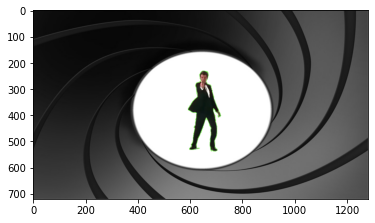

In [107]:
fg = cv2.imread('../images/fg.jpg')
bg = cv2.imread('../images/bg.jpg')

fg = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

lower = np.array([0, 200, 0])
upper = np.array([100, 255, 100])

mask = cv2.inRange(fg, lower, upper)

fg[mask != 0] = [0, 0, 0]
bg[mask == 0] = [0, 0, 0]

img = np.add(fg, bg)
plt.imshow(img)

### 1. (b) Graft 007 (fg.jpg) onto Bond's Skyfall mansion (mansion.jpg)

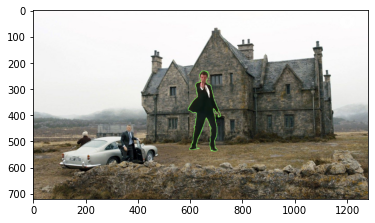

In [108]:
mansion = cv2.imread('../images/skyfall_mansion.jpg')
mansion = cv2.cvtColor(mansion, cv2.COLOR_BGR2RGB)

mansion[mask == 0] = [0, 0, 0]

img = np.add(fg, mansion)
plt.imshow(img)

### 1. (c) Grafting Ironman foreground green screen image onto background image

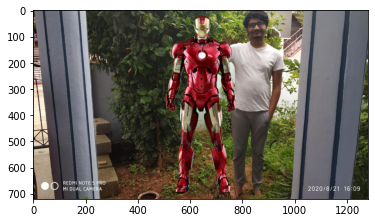

In [110]:
fg = cv2.imread('../images/ironman.jpg')
bg = cv2.imread('../images/samartha.jpg')

fg = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

mask = cv2.inRange(fg, lower, upper)

fg[mask != 0] = [0, 0, 0]
bg[mask == 0] = [0, 0, 0]

img = np.add(fg, bg)
plt.imshow(img)

As the **fg** image has a green background, we can easily distinguish a pixel containing the subject from green background. Hence, I created a mask with some predefined lower and upper bounds for pixel values to consider only green pixels. Then I retained only those pixels that contain subject in **fg** image and clamped rest pixels to [0, 0, 0] RGB values which means all pixels containing green background will be clamped to [0, 0, 0]. Similarly, I clamped pixels corresponding to subject in **fg** image in **bg** image to [0, 0, 0] RGB values. Later, adding them gives the desired image because in **fg** image, we only have subject pixels as non-zero values and in **bg** image, we only have background pixels as non-zero values.

### 2. Calculate number of images of size 1280 x 720 which can be stored in the cloud with size of 4GB

As the images are stored to be displayed on standard display, the image is taken as RGB image (3 channels). Hence, each pixel has 3 bytes of data with intensity information (1 byte for each color channel). Hence each pixel takes up 3 bytes (24 bits) of storage.

As the image size is 1280 x 720, there are total of 1280\*720 = 921600 pixels. Hence, the amount of storage taken by 1 image = 921600\*3 B = 2764800B = 2700KB.

Total amount of storage available = 4GB = 4096MB = 4194304KB.\
Number of images = $\large \frac{4194304}{2700}$ = 1553.45 $\small  \approx$ 1553

Hence, approximately 1553 images can be stored in the cloud.

# Question 2 (MI6 Storage Issues : Part 1)

---

Let the size of the image be N x N. Hence, total number of pixels in the image = $N^2$.\
Size of the image $= 168.75MB = 168.75*1024 KB = 172800KB = 172800*1024 B = 176947200B$.\
As each pixel has 3B data (1B (8 bits) for each color channel), image should be having $3N^2$ B data.

Hence, $3N^2 = 176947200$\
$\implies N^2 = 58982400$\
$\implies N = 7680$

Hence, image size is 7680 x 7680 pixels.

# Question 3 (Don’t fly too close to the sun)

---

##### Given:
Focal length of the lens (f) = 62.5mm = 6.25cm\
Height of the object (insignia) ($h_o$) = 32.8cm\
Dimensions of CCD sensor = 10 x 10 mm = 1 x 1 cm\
Number of pixels in CCD sensor = 1024 x 1024 pixels\
Minimum height of image = 50 pixels

Height of the image ($h_i$) = ?\
Image distance (v) = ?\
Object distance (u) = d

Height of the image ($h_i$) = $50 \left( \frac{\large 1}{\large 1024} \right)$ cm\
Magnification (m) $= \frac{\large v}{\large u} = \frac{\large h_i}{\large h_o}$

$\implies \frac{\large v}{\large d} = \frac{\large 50}{\large 32.8*1024}$

$\implies v = \frac{\large 50*d}{\large 33587.2}$

Lens formula,\
$\frac{\large 1}{\large f} = \frac{\large 1}{\large v} - \frac{\large 1}{\large u}$

$\implies \frac{\large 1}{\large 6.25} = \frac{\large 33587.2}{\large 50*d} + \frac{\large 1}{\large d}$

$\implies \frac{\large 1}{\large 6.25} = \frac{\large 1}{\large d} \left( 671.744 + 1 \right)$

$\implies d = 6.25*672.744$

$\implies d = 4204.65cm$

$\implies d \approx 42m$

# Question 4 (Le Chiffre Strikes Again!)

---

### 1. Write a function *bitQuantizeImage* which takes an 8-bit image im and k, the number of bits to which the image needs to be quantized to and returns the k-bit quantized image.

In [114]:
def bitQuantizeImage(im, k):
    im = np.int32(im)
    
    im = np.floor(np.divide(im, np.power(2, 8-k)))
    im = np.divide(np.multiply(im, 255), np.power(2, k)-1)
    
    return np.uint8(im)

The function **bitQuantizeImage** takes the image and k as inputs and returns k-bit quantized image.

Dividing the image array by $2^{8-k}$ will quantize the image to k-bits (i.e. values are in range [0, $2^k-1$]).

But as the standard display requires the image to be scaled in range [0, 255], we need to stretch the range from [0, $2^k-1$] to [0, 255]. Multiplying by 255 and then dividing by ($2^k-1$) will do this job.

### 2. M wants an experienced hand to take this assignment, so prove yourself by running the above function on 007 test1.jpg and find all possible quantization results (k=1 to k=8).

In [115]:
im = cv2.imread('../images/007_test1.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

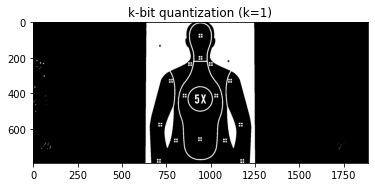

In [116]:
plt.title('k-bit quantization (k=1)')
plt.imshow(bitQuantizeImage(im, 1), cmap='gray', vmin=0, vmax=255)

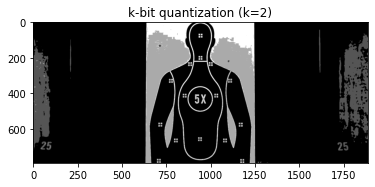

In [117]:
plt.title('k-bit quantization (k=2)')
plt.imshow(bitQuantizeImage(im, 2), cmap='gray', vmin=0, vmax=255)

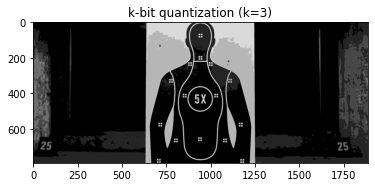

In [118]:
plt.title('k-bit quantization (k=3)')
plt.imshow(bitQuantizeImage(im, 3), cmap='gray', vmin=0, vmax=255)

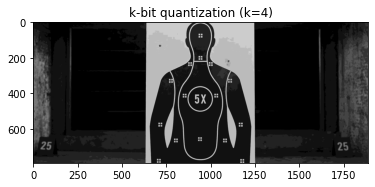

In [119]:
plt.title('k-bit quantization (k=4)')
plt.imshow(bitQuantizeImage(im, 4), cmap='gray', vmin=0, vmax=255)

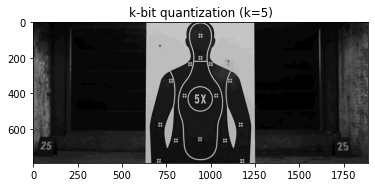

In [120]:
plt.title('k-bit quantization (k=5)')
plt.imshow(bitQuantizeImage(im, 5), cmap='gray', vmin=0, vmax=255)

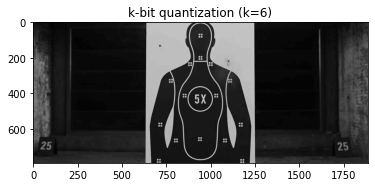

In [121]:
plt.title('k-bit quantization (k=6)')
plt.imshow(bitQuantizeImage(im, 6), cmap='gray', vmin=0, vmax=255)

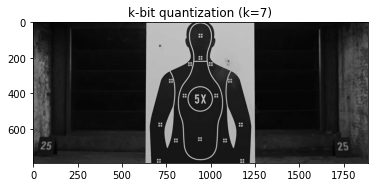

In [122]:
plt.title('k-bit quantization (k=7)')
plt.imshow(bitQuantizeImage(im, 7), cmap='gray', vmin=0, vmax=255)

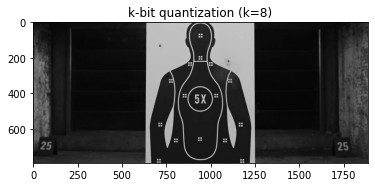

In [123]:
plt.title('k-bit quantization (k=8)')
plt.imshow(bitQuantizeImage(im, 8), cmap='gray', vmin=0, vmax=255)

### 3. M is still not satisfied enough, so she commands you to show all the bit planes of 007 test2.jpg. Pass the test.

In [127]:
def bitPlaneSlice(im, k):
    im = np.int32(im)
    
    im = np.multiply(np.divide(im & np.power(2, k-1), np.power(2, k-1)), 255)
    
    return np.uint8(im)

The function **bitPlaneSlice** takes image and k as inputs and returns $k^{th}$ bit plane of the image.

Applying **bitwise and (&)** operator on input image clamps the pixels which have $k^{th}$ bit as 0 to 0 and rest pixels to $2^k$. Hence dividing by $2^k$ gives binary array with 0s and 1s which indicate the $k^{th}$ bit plane.

Now, for display purposes, we need to map this [0, 1] range image to [0, 255] because for viewing purposes, we need to have 8-bit image ([0, 255]). Hence, multiplying by 255 does this job.

This procedure will give the $k^{th}$ bit plane of the input image.

In [128]:
im = cv2.imread('../images/007_test2.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

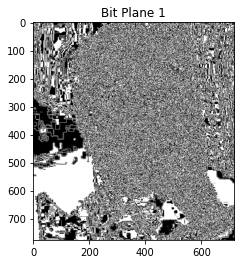

In [129]:
plt.title('Bit Plane 1')
plt.imshow(bitPlaneSlice(im, 1), cmap='gray', vmin=0, vmax=255)

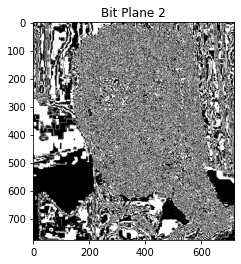

In [130]:
plt.title('Bit Plane 2')
plt.imshow(bitPlaneSlice(im, 2), cmap='gray', vmin=0, vmax=255)

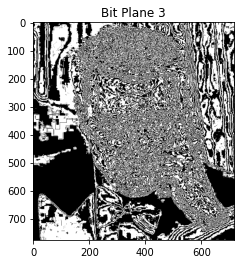

In [131]:
plt.title('Bit Plane 3')
plt.imshow(bitPlaneSlice(im, 3), cmap='gray', vmin=0, vmax=255)

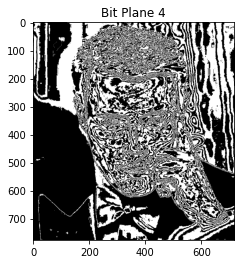

In [132]:
plt.title('Bit Plane 4')
plt.imshow(bitPlaneSlice(im, 4), cmap='gray', vmin=0, vmax=255)

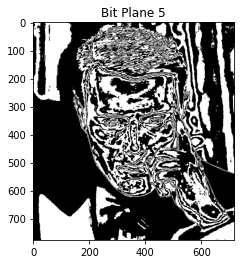

In [133]:
plt.title('Bit Plane 5')
plt.imshow(bitPlaneSlice(im, 5), cmap='gray', vmin=0, vmax=255)

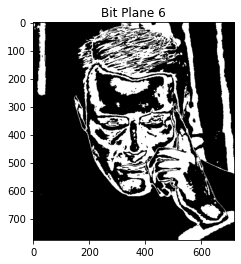

In [134]:
plt.title('Bit Plane 6')
plt.imshow(bitPlaneSlice(im, 6), cmap='gray', vmin=0, vmax=255)

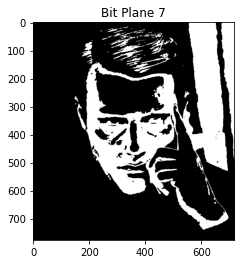

In [135]:
plt.title('Bit Plane 7')
plt.imshow(bitPlaneSlice(im, 7), cmap='gray', vmin=0, vmax=255)

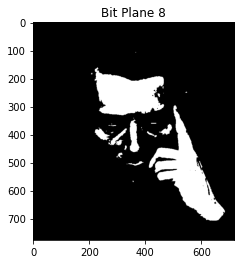

In [136]:
plt.title('Bit Plane 8')
plt.imshow(bitPlaneSlice(im, 8), cmap='gray', vmin=0, vmax=255)

### 4. Now that you have passed, you are declared fit for active duty. Help 007 guess the corruption procedure for a target person’s image, tanner_corrupt.jpg, using the above functions. The correct images that you know for that corresponding person from the database is represented by tanner.jpg

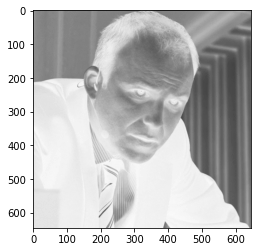

In [137]:
im = cv2.imread('../images/tanner.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = np.int32(im)

im = 255 - im
im = bitQuantizeImage(im, 7)

im = np.uint8(im)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

As it is visually perceivable that the corrupted image is obtained by using **negative** transform, the input image is first transformed using **negative** transform. Later, a **7-bit quantization** is applied to image to obtain nearly similar image as corrupted image.

# Question 5 (007 and Quantum)

---

### 1 Given image im, integers a and b, write a function *linContrastStretching* to enhance the contrast such that the resulting intensity range is [a, b]

In [138]:
def linContrastStretching(im, a, b):
    im = np.int32(im)
    
    im_min = np.min(im)
    im_max = np.max(im)
    
    im = np.add(a, np.divide(np.multiply(np.subtract(im, im_min), np.subtract(b, a)), np.subtract(im_max, im_min)))
    return np.uint8(im)

### 2 Use the above function *linContrastStretching* to improve intensity of quantum_bad.jpg

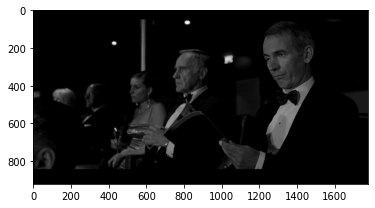

In [139]:
im = cv2.imread('../images/quantum_bad.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im = linContrastStretching(im, 0, 255)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

The function **linContrastStretching** stretches the intensity levels from one intensity range to another wider intensity range and hence increases the contrast in image because now we have bigger range of intensity levels. Human eyes perceive larger differences in intensity levels easily as edges and hence, contrast stretching helps us get more detail on edges in the image to better understand the image.

Formulation of **linContrastStretching**,

Let **min** and **max** be minimum and maximum intensity values respectively in input image.

Let **a** and **b** be minimum and maximum intensity values respectively of contrast stretched image.

Let **r** be the intensity value in input image and **S** be the corresponding intensity level in output image.

$ s = a + \frac {r - min}{max - min} (b - a) $

# Question 6 (Think about your sins!)

---


### 1. Write a function histEqualization which takes a grayscale image im, and applies histogram equalization on the entire image.

In [140]:
def histEqualization(im):
    im = np.int32(im)
    
    n = np.histogram(im, np.arange(257))[0]
    arr = np.rint(np.multiply(np.cumsum(np.divide(n, np.sum(n))), 255))
    
    ret = arr[im]
    return np.uint8(ret)

### 2. Write a function histMatching which takes an input image and a reference image and applies histogram Matching on the input image by matching the histogram with that of the reference image.

In [141]:
def histMatching(inpimg, refimg):
    inpimg = np.int32(inpimg)
    refimg = np.int32(refimg)
    
    n = np.histogram(inpimg, np.arange(257))[0]
    s = np.rint(np.multiply(np.cumsum(np.divide(n, np.sum(n))), 255))
    
    n = np.histogram(refimg, np.arange(257))[0]
    z = np.rint(np.multiply(np.cumsum(np.divide(n, np.sum(n))), 255))
    
    res = np.searchsorted(z, s)
    ret = res[inpimg]
    
    return np.uint8(ret)

### 3. You are supposed to document the mathematical formulae for the function used above.

---

##### Histogram Equalization

Let $r_k$ be the $k^{th}$ intensity level of input image and $s_k$ be the corresponding mapped intensity level in histogram equalized image.

Considering **r** and **s** to continuous,

Let $p_{R}(r)$ be the PDF (Probability Density Function) of random variable r.

Let $p_{S}(s)$ be the PDF (Probability Density Function) of random variable s.

As we want the output image to be histogram equalized, $p_{S}(s)$ should be constant.

$ \implies $$\int_{0}^{L-1} p_{S}(s) ds$$ = 1$

$ \implies p_{S}(s)$$\int_{0}^{L-1} ds$$ = 1$

$ \implies p_{S}(s) = \frac {1}{L-1}$

We want,

$ p_{S}(s) = p_{R}(r) \Large \frac {dr}{ds}$

$ \implies p_{S}(s)ds = p_{R}(r)dr$

$ \implies \frac {1}{L-1} ds = p_{R}(r)dr $

$ \implies ds = (L-1) p_{R}(r)dr$

Integrating on both sides,

$ \implies s = (L-1) $$\int_{0}^{r} p_{R}(w)dw$

As **r** is discrete,

$s_k = T(r_k) = round\bigg((L-1)\sum_{i=0}^{k} p_R(r_i)\bigg) $	


##### Histogram Specification

Let **r** be the intensity levels of input image and **s** be the corresponding mapped intensity level in histogram equalized image of the input image and **z** be the desired intensity levels of reference image.

From histogram equalization, we have

$s_k = T(r_k)$

$ s = G(z)$

Now, we take the inverse relation from the above equation

$ \implies z = G^{-1}(s)$

$ \implies z = G^{-1}(T(r))$

Hence, intensity level in input image ($r_k$) gets mapped to intensity level of reference image ($z_k$) by the above relation.

### 4. Q asks you to practice histEqualization on practice range1.jpg and hist.jpg

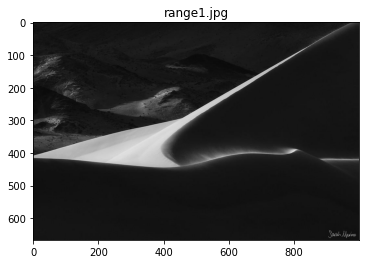

In [142]:
im = cv2.imread('../images/practice_range1.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.title('range1.jpg')
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

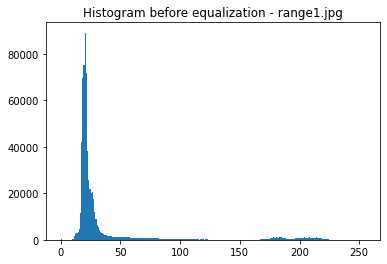

In [143]:
plt.title('Histogram before equalization - range1.jpg')
_ = plt.hist(im.flatten(), bins=np.arange(256))

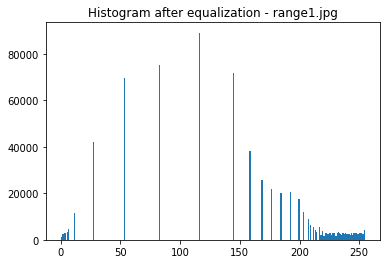

In [144]:
ret = histEqualization(im)

plt.title('Histogram after equalization - range1.jpg')
_ = plt.hist(ret.flatten(), bins=np.arange(256))

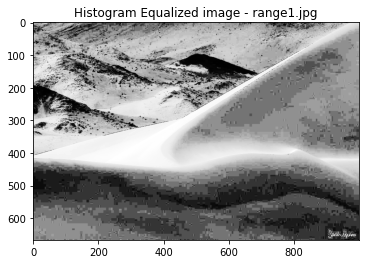

In [145]:
plt.title('Histogram Equalized image - range1.jpg')
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

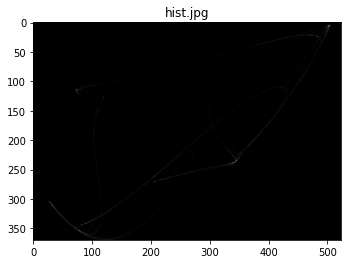

In [146]:
im = cv2.imread('../images/hist.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.title('hist.jpg')
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

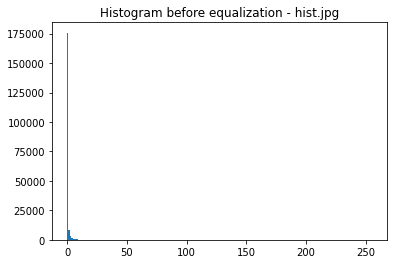

In [147]:
plt.title('Histogram before equalization - hist.jpg')
_ = plt.hist(im.flatten(), bins=np.arange(256))

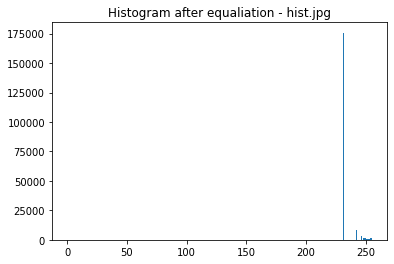

In [148]:
ret = histEqualization(im)

plt.title('Histogram after equaliation - hist.jpg')
_ = plt.hist(ret.flatten(), bins=np.arange(256))

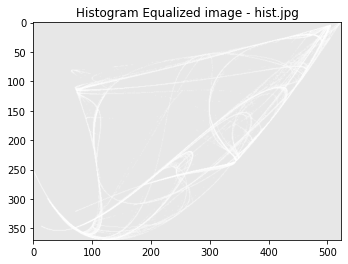

In [149]:
plt.title('Histogram Equalized image - hist.jpg')
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

### Decipher the map using the satellite image by applying histMatching.

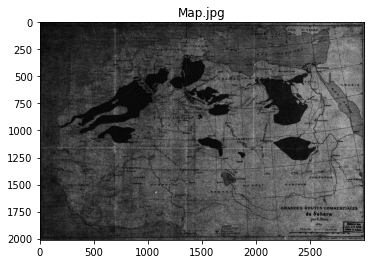

In [150]:
Map = cv2.imread('../images/Map.jpg')
Map = cv2.cvtColor(Map, cv2.COLOR_BGR2GRAY)
Sat = cv2.imread('../images/satellite_img.jpg')
Sat = cv2.cvtColor(Sat, cv2.COLOR_BGR2GRAY)

plt.title('Map.jpg')
plt.imshow(Map, cmap='gray', vmin=0, vmax=255)

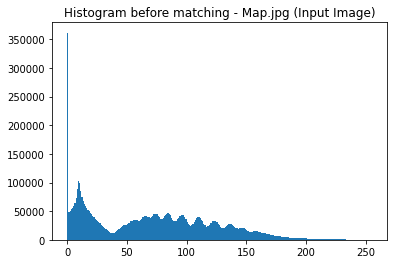

In [151]:
plt.title('Histogram before matching - Map.jpg (Input Image)')
_ = plt.hist(Map.flatten(), bins=np.arange(256))

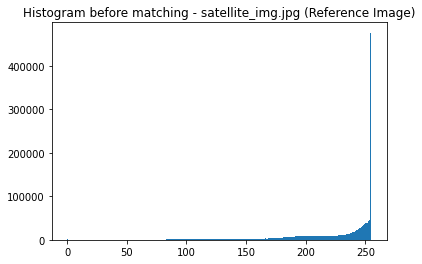

In [152]:
plt.title('Histogram before matching - satellite_img.jpg (Reference Image)')
_ = plt.hist(Sat.flatten(), bins=np.arange(256))

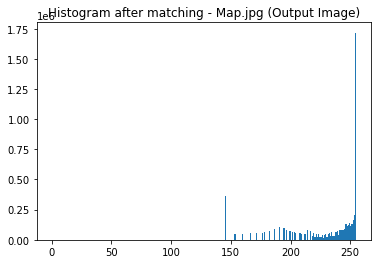

In [153]:
ret = histMatching(Map, Sat)

plt.title('Histogram after matching - Map.jpg (Output Image)')
_ = plt.hist(ret.flatten(), bins=np.arange(256))

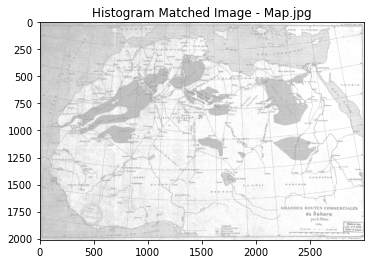

In [155]:
plt.title('Histogram Matched Image - Map.jpg')
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

The indicative piece of string reads as following **"Come here. Find out why Vesper died. James".**

# Question 7 (The villains of 007)

---

### 1. Write a function piecewiseLinTransform to implement a piecewise linear transform
$$ g(z) = K^i_1 \cdot z + K^i_2 ; \hspace{2mm} a^i \leq z \leq b^i $$
### The function takes an input grayscale image, coefficients K 1 ,K 2 and intervals [a, b] for each linear segment and produces the transformed output image.

In [156]:
def piecewiseLinTransform(im, K, R):
    im = np.int32(im)
    im = im/255
    
    res = np.zeros(im.shape, dtype='float')
    for i in range(R.shape[0]):
        res += np.logical_and(im >= R[i][0], im < R[i][1])*(K[i][0] * im + K[i][1])

    res = res*255
    return np.uint8(res)

### 2. Run the images through piecewiseLinTransform on bondvillain1.jpg and bondvillain2.jpg. The piecewise linear functions to be used are given for each image.

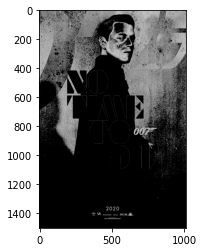

In [157]:
im1 = cv2.imread('../images/bondvillain1.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

K = np.array([[0, 0], [4/3, 0], [-2, 2], [0, 0], [0, 0]])
R = np.array([[0, 0.3], [0.3, 0.6], [0.6, 0.8], [0.8, 1], [1, 2]])
ret = piecewiseLinTransform(im1, K, R)

plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

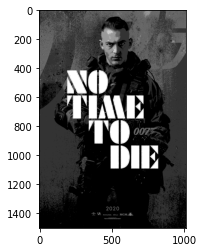

In [158]:
im2 = cv2.imread('../images/bondvillain2.jpg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

K = np.array([[0, 0], [0, 0.2], [0, 0.4], [0, 0.6], [0, 0.8], [0, 1]])
R = np.array([[0, 0.2], [0.2, 0.4], [0.4, 0.6], [0.6, 0.8], [0.8, 1], [1, 2]])
ret = piecewiseLinTransform(im2, K, R)

plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

### 3. Take any image of any from the internet and run piecewiseLinTransform using any custom piecewise linear function that you like. Plot the function used.

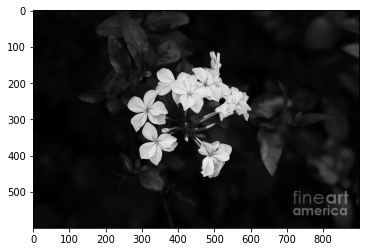

In [159]:
im = cv2.imread('../images/flower.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

K = np.array([[1, 0], [0, 0.2], [1, 0.2], [0, 1]])
R = np.array([[0, 0.2], [0.2, 0.5], [0.5, 0.8], [0.8, 1]])
ret = piecewiseLinTransform(im, K, R)

plt.imshow(im, cmap='gray', vmin=0, vmax=255)

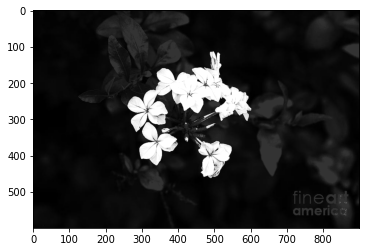

In [160]:
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

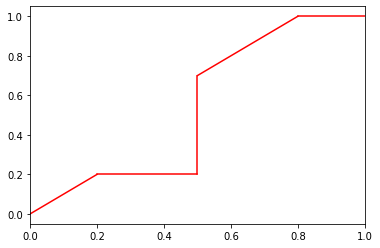

In [162]:
plt.xlim(0, 1)
plt.plot([[0], [0.2]], [0, 0.2], color='red')
plt.plot([[0.2], [0.5]], [0.2, 0.2], color='red')
plt.plot([[0.5], [0.5]], [0.2, 0.7], color='red')
plt.plot([[0.5], [0.8]], [0.7, 1], color='red')
plt.plot([[0.8], [1]], [1, 1], color='red')
plt.show()

### What difference do you notice in the piecewise linear transforms of two images, especially in the text overlay?

Yes, there is difference in piecewise linear transforms of two images, especially in text overlay.

In first image (**bondvillain1.jpg**), we see that lower intensities are getting mapped to lower intensities itself. But higher intensities are also getting mapped to lower intensities. The text which had higher intensities got mapped to 0 which made it competely black and as the character in the image is of low intensity, the text has blended with the character and hence, we cant read the text properly in the transformed image.

Whereas in the second image (**bondvillain2.jpg**), we see that it is a step function and hence, lower intensities are getting mapped to lower intensities and higher intensities are getting mapped to higher intensities and hence there is not much intensity variation found. And as the text intensity is very high and it is getting mapped to high intensity, we can easily read it from the transformed image.

# Question 8 (Tomorrow Never Dies)

---

### 1. Write a function gammaTransform that implements $$ s = r^\gamma $$ on a grayscale image and vary γ.

In [163]:
def gammaTransform(im, gamma):
    im = np.int32(im)
    
    im = np.multiply(np.power(np.divide(im, 255), gamma), 255)
    
    return np.uint8(im)

### 2. Use this function on stealth.png and increase illumination in the image. Report value of gamma used.

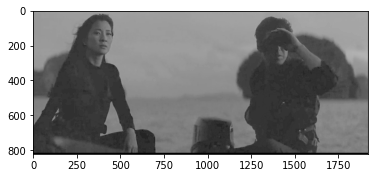

In [166]:
im = cv2.imread('../images/stealth.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret = gammaTransform(im, 0.4)
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

Gamma value used is **0.4**

### 3. Use this function on unstealth.png and hide yourself as you try to apprehend Carver. Make illumination lesser. Report value of gamma used.

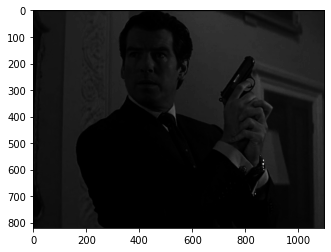

In [167]:
im = cv2.imread('../images/unstealth.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret = gammaTransform(im, 1.8)
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

Gamma value used is **1.8**

### 4. Use this function on your Aston Martin DBS image, aston invisible.jpg to see the numberplate clearly so that you can travel to London to report for duty. You will be evaluated on how clear the number plate is after the transformation.

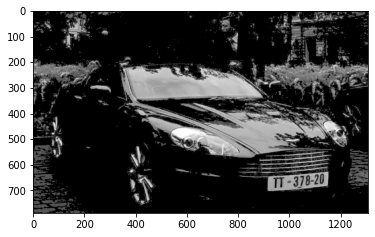

In [168]:
im = cv2.imread('../images/aston_invisible.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret = gammaTransform(im, 0.2)
plt.imshow(ret, cmap='gray', vmin=0, vmax=255)

Gamma value used is **0.2**. Number plate - **"TT-378-20"**.

# Question 9 (Is that the best you got?)

---

Name of the person who died - **Vesper**

### 2. Retrieve the original image using these four images as best you can. You can use any combinations of techniques used in this assignment.

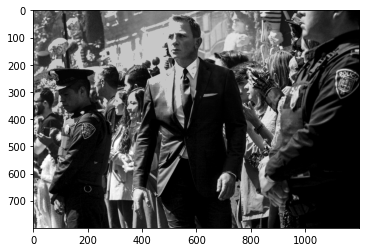

In [169]:
j1 = cv2.imread('../images/james1.jpg')
j1 = cv2.cvtColor(j1, cv2.COLOR_BGR2GRAY)
j2 = cv2.imread('../images/james2.jpg')
j2 = cv2.cvtColor(j2, cv2.COLOR_BGR2GRAY)
j3 = cv2.imread('../images/james3.jpg')
j3 = cv2.cvtColor(j3, cv2.COLOR_BGR2GRAY)
j4 = cv2.imread('../images/james4.jpg')
j4 = cv2.cvtColor(j4, cv2.COLOR_BGR2GRAY)

j1 = linContrastStretching(j1, 0, 200)

j2 = gammaTransform(j2, 2)
j2 = linContrastStretching(j2, 0, 230)

j3 = gammaTransform(j3, 3)

j4 = gammaTransform(j4, 6)
j4 = linContrastStretching(j4, 0, 230)

img = np.vstack((np.hstack((j1, j2)), np.hstack((j3, j4))))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)